In [1]:
import sys, tweepy
import textblob
import matplotlib.pyplot as plt
import config

In [24]:
consumerKey = config.consumerKey
consumerSecret = config.consumerSecret
accessToken = config.accessToken
accessTokenSecret = config.accessTokenSecret

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

if(api.verify_credentials()!=False):
    print("valid auth")

valid auth


In [25]:
def percent(part, total):
    return 100*float(part)/float(total)

In [42]:
#input
keyword = str(input("Please input keyword: "))
number = int(input("Number of tweets: "))


Please input keyword: thanos
Number of tweets: 100


30 37 33 -6.780823863636361


<function matplotlib.pyplot.show(*args, **kw)>

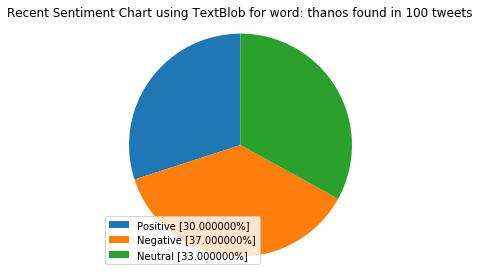

In [48]:
positive = 0
negative = 0
neutral = 0
polarity = 0

tweets = tweepy.Cursor(api.search, q=keyword, rpp=100, result_type="recent", include_entities=True, lang="en").items(number)
for tweet in tweets:
    #print(tweet.text)
    analysis = textblob.TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity==0):
        neutral +=1
    elif(analysis.sentiment.polarity<0.0000):
        negative +=1
    elif(analysis.sentiment.polarity>0.0000):
        positive +=1
        
print(positive, negative, neutral, polarity)

perPositive = format(percent(positive, number),'02f')
perNegative = format(percent(negative, number),'02f')
perNeutral = format(percent(neutral, number),'02f')

sizes = [perPositive, perNegative, perNeutral]
labels = ['Positive [' + str(perPositive) + '%]','Negative [' + str(perNegative) + '%]','Neutral [' + str(perNeutral) + '%]']
p, t = plt.pie(sizes, startangle=90)
plt.title("Recent Sentiment Chart using TextBlob for word: "+keyword+" found in "+str(number)+ " tweets")
plt.axis("equal")
plt.legend(p, labels,loc="best")
plt.tight_layout()
plt.show